## Dataframe indicador Gini Index States

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
import csv
import json

In [2]:
!pip install --upgrade matplotlib --quiet

In [3]:
!pip install --upgrade seaborn --quiet

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import seaborn as sns

### PNAD Contínua

### Acessando o dataframe original

Entrar no site http://www.ipeadata.gov.br/Default.aspx

Em "Séries mais acessadas Ipeadata Social" clicar em "Índice de Gini"

Escolher a desagregação "Por UF"

No canto superior direito exportar arquivo em xlsx

Coluna "GINI"

In [8]:
#O arquivo foi redirecionado para a pasta data, onde estão todos os arquivos originais
arquivo = "ADH_BASE_RADAR_2012-2021.xlsx"

caminho_completo = os.path.abspath(arquivo)
print("O caminho completo para o arquivo é:", caminho_completo)

O caminho completo para o arquivo é: D:\docs_mariana\ProjetosGit\Convergencia\ADH_BASE_RADAR_2012-2021.xlsx


In [9]:
df_mul_siafi_ibge = pd.read_excel('D:\docs_mariana\ProjetosGit\Convergencia\data\ADH_BASE_RADAR_2012-2021.xlsx')

In [10]:
df_mul_siafi_ibge.head(11)

,ANO,AGREGACAO,CODIGO,NOME,IDHM,IDHM_L,IDHM_E,IDHM_R,I_ESCOLARIDADE,I_FREQ_PROP,...,POP6A17,POP11A13,POP15A17,POP15M,POP18A20,POP18A24,POP18M,POP25M,POP65M,POPOCUP18M
0,2012,BRASIL,NaN,NaN,0.746,0.825,0.687,0.732,0.606,0.731,...,39808859,10304212,10609288,150994845,10076087,23924348,140385557,116461209,15249133,84277753
1,2013,BRASIL,NaN,NaN,0.753,0.830,0.698,0.737,0.615,0.744,...,39055262,9986737,10521249,153338252,10336071,24034903,142817003,118782100,15820311,86108710
2,2014,BRASIL,NaN,NaN,0.762,0.835,0.715,0.741,0.630,0.761,...,38765780,9687655,10446675,155356978,10224771,23840076,144910303,121070227,16425141,87308460
3,2015,BRASIL,NaN,NaN,0.765,0.840,0.724,0.736,0.642,0.769,...,38189476,9314133,10401307,157576293,10394554,23851445,147174986,123323541,17060247,87756538
4,2016,BRASIL,NaN,NaN,0.771,0.845,0.740,0.734,0.657,0.786,...,37694949,9288033,10375148,159692542,10242815,23779687,149317393,125537706,17728449,87110394
5,2017,BRASIL,NaN,NaN,0.774,0.849,0.742,0.735,0.655,0.789,...,36965134,9178387,9987551,161671766,10306849,23975663,151684215,127708552,18431296,87616245
6,2018,BRASIL,NaN,NaN,0.780,0.854,0.749,0.741,0.662,0.797,...,36460225,9041166,9641591,163492349,10093878,23998725,153850757,129852032,19168661,89281706
7,2019,BRASIL,NaN,NaN,0.785,0.858,0.760,0.743,0.674,0.807,...,35999274,8951264,9389698,165329825,10194743,23952392,155940127,131987735,19941230,91579200
8,2020,BRASIL,NaN,NaN,0.784,0.854,0.768,0.736,0.695,0.807,...,35750038,8751715,9357153,167005197,9806225,23521448,157648044,134126596,20748553,83946549
9,2021,BRASIL,NaN,NaN,0.766,0.819,0.757,0.724,0.703,0.785,...,35708677,8708856,9273169,168679921,9546945,23143737,159406751,136263014,21590309,86645408


In [11]:
df_mul_siafi_ibge.columns

Index(['ANO', 'AGREGACAO', 'CODIGO', 'NOME', 'IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'P

In [12]:
df_dim_eco_gini = df_mul_siafi_ibge.drop(columns=['IDHM', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M'])

In [13]:
df_dim_eco_gini.head()

,ANO,AGREGACAO,CODIGO,NOME,GINI
0,2012,BRASIL,NaN,NaN,0.540
1,2013,BRASIL,NaN,NaN,0.532
2,2014,BRASIL,NaN,NaN,0.526
3,2015,BRASIL,NaN,NaN,0.524
4,2016,BRASIL,NaN,NaN,0.537


In [14]:
df_dim_eco_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        490 non-null    int64  
 1   AGREGACAO  490 non-null    object 
 2   CODIGO     480 non-null    float64
 3   NOME       480 non-null    object 
 4   GINI       490 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.3+ KB


In [15]:
df_dim_eco_gini['ANO'] = df_dim_eco_gini['ANO'].astype(int)

In [16]:
df_dim_eco_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        490 non-null    int32  
 1   AGREGACAO  490 non-null    object 
 2   CODIGO     480 non-null    float64
 3   NOME       480 non-null    object 
 4   GINI       490 non-null    float64
dtypes: float64(2), int32(1), object(2)
memory usage: 17.4+ KB


In [17]:
df_dim_eco_gini.head()

,ANO,AGREGACAO,CODIGO,NOME,GINI
0,2012,BRASIL,NaN,NaN,0.540
1,2013,BRASIL,NaN,NaN,0.532
2,2014,BRASIL,NaN,NaN,0.526
3,2015,BRASIL,NaN,NaN,0.524
4,2016,BRASIL,NaN,NaN,0.537


In [18]:
df_dim_eco_gini_est = df_dim_eco_gini.dropna(how='any')
df_dim_eco_gini_est.tail()

,ANO,AGREGACAO,CODIGO,NOME,GINI
485,2021,RM_RIDE,41.0,Região Metropolitana de Curitiba (PR),0.488
486,2021,RM_RIDE,42.0,Região Metropolitana de Florianópolis (SC),0.484
487,2021,RM_RIDE,43.0,Região Metropolitana de Porto Alegre (RS),0.491
488,2021,RM_RIDE,51.0,Região Metropolitana de Vale do Rio Cuiabá (MT),0.484
489,2021,RM_RIDE,52.0,Região Metropolitana de Goiânia (GO),0.500


In [19]:
df_dim_eco_gini_est.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 10 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        480 non-null    int32  
 1   AGREGACAO  480 non-null    object 
 2   CODIGO     480 non-null    float64
 3   NOME       480 non-null    object 
 4   GINI       480 non-null    float64
dtypes: float64(2), int32(1), object(2)
memory usage: 20.6+ KB


In [20]:
df_dim_eco_gini_est['CODIGO'] = df_dim_eco_gini_est['CODIGO'].astype(int)

In [21]:
df_dim_eco_gini_est.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 10 to 489
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        480 non-null    int32  
 1   AGREGACAO  480 non-null    object 
 2   CODIGO     480 non-null    int32  
 3   NOME       480 non-null    object 
 4   GINI       480 non-null    float64
dtypes: float64(1), int32(2), object(2)
memory usage: 18.8+ KB


In [22]:
# Filtrar linhas onde a coluna 'coluna' contenha 'RM_RIDE'
df_dim_eco_gini_est = df_dim_eco_gini_est[~df_dim_eco_gini_est['AGREGACAO'].str.contains('RM_RIDE')]

In [23]:
df_dim_eco_gini_est.tail()

,ANO,AGREGACAO,CODIGO,NOME,GINI
275,2021,UF,43,Rio Grande do Sul,0.468
276,2021,UF,50,Mato Grosso do Sul,0.496
277,2021,UF,51,Mato Grosso,0.461
278,2021,UF,52,Goiás,0.467
279,2021,UF,53,Distrito Federal,0.566


In [24]:
df_dim_eco_gini_est = df_dim_eco_gini_est.drop(columns=['AGREGACAO', 'NOME'])

In [25]:
df_dim_eco_gini_est.tail()

,ANO,CODIGO,GINI
275,2021,43,0.468
276,2021,50,0.496
277,2021,51,0.461
278,2021,52,0.467
279,2021,53,0.566


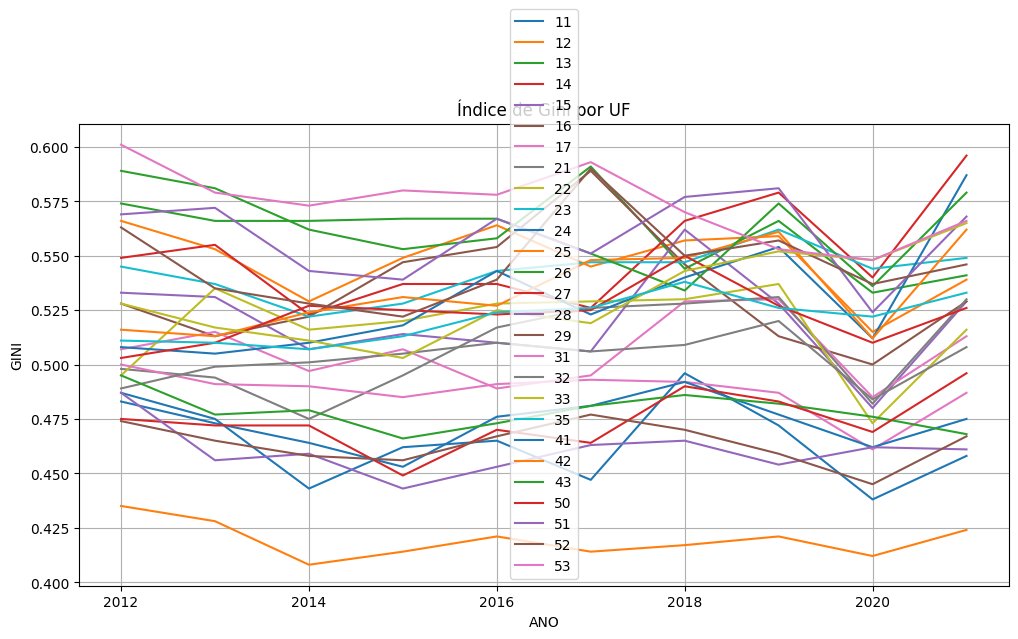

In [26]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Iterando sobre cada 'Unidade Territorial'
for território, dados_território in df_dim_eco_gini_est.groupby('CODIGO'):
    plt.plot(dados_território['ANO'], dados_território['GINI'], label=território)

# Adicionando título e rótulos aos eixos
plt.title('Índice de Gini por UF')
plt.xlabel('ANO')
plt.ylabel('GINI')
plt.legend()
plt.grid(True)

plt.show()

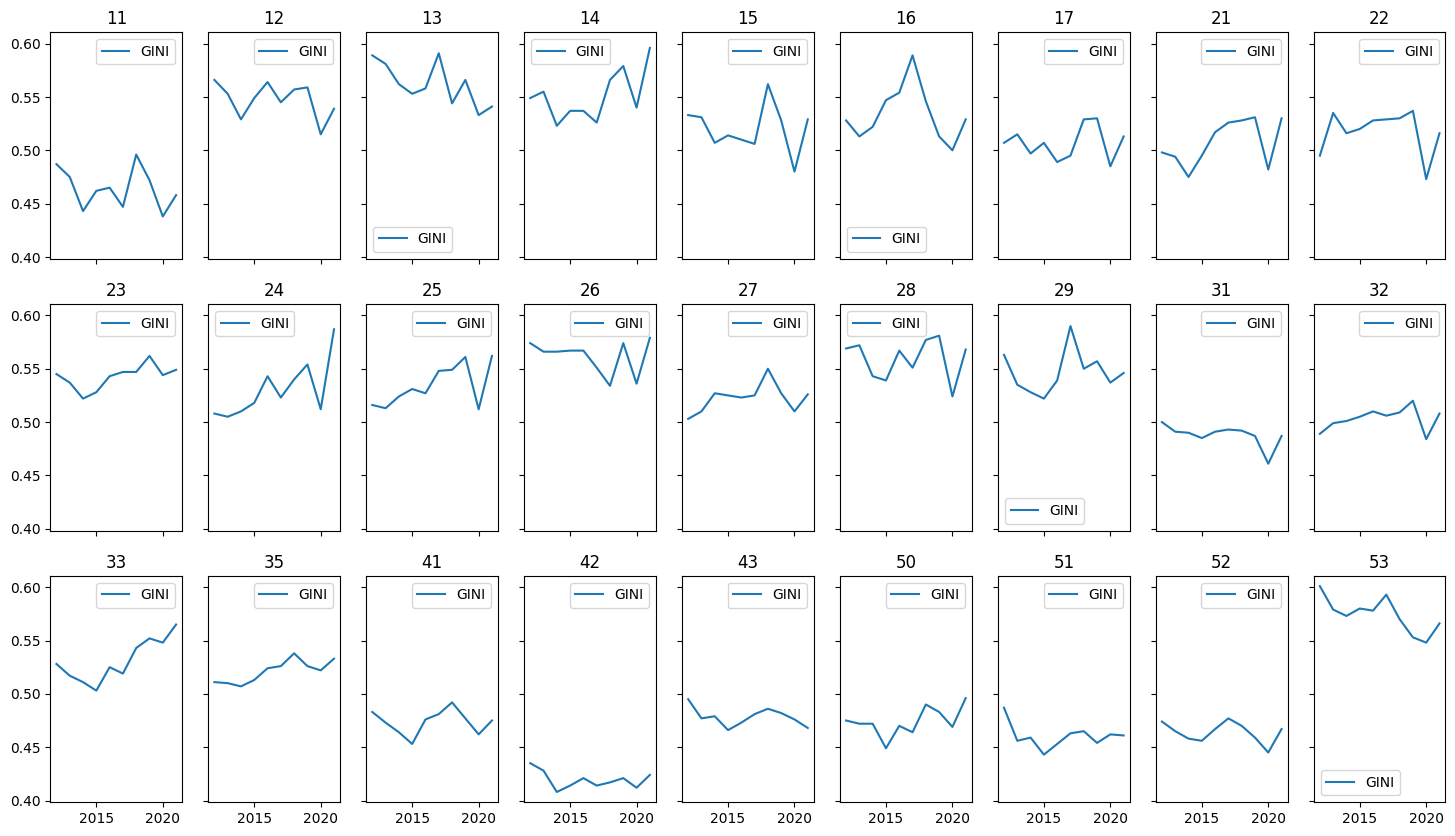

In [27]:
# Obter lista de unidades territoriais únicas
unidades_territoriais = df_dim_eco_gini_est['CODIGO'].unique()

# Criar uma matriz de 3x9 para os subplots
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(18, 10), sharex=True, sharey=True)

# Iterar sobre cada unidade territorial e plotar um gráfico para cada uma delas
for idx, territorial in enumerate(unidades_territoriais):
    row = idx // 9  # Calcula a linha atual
    col = idx % 9   # Calcula a coluna atual
    ax = axes[row, col]  # Obtém o subplot atual
    
    # Filtrar os dados para a unidade territorial atual
    data = df_dim_eco_gini_est[df_dim_eco_gini_est['CODIGO'] == territorial]
    
    # Plotar o gráfico de linhas para a unidade territorial atual
    data.plot(kind='line', x='ANO', y='GINI', ax=ax, title=territorial)
    
    # Remover rótulos do eixo x e y para manter o layout limpo
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar o layout
#plt.tight_layout()

plt.show()

In [28]:
pivot_df_dim_eco_gini_est = df_dim_eco_gini_est.pivot(index='ANO', columns='CODIGO', values='GINI')

In [29]:
pivot_df_dim_eco_gini_est.head()

CODIGO,11,12,13,14,15,16,17,21,22,23,...,32,33,35,41,42,43,50,51,52,53
ANO,,,,,,,,,,,,,,,,,,,,,
2012,0.487,0.566,0.589,0.549,0.533,0.528,0.507,0.498,0.495,0.545,...,0.489,0.528,0.511,0.483,0.435,0.495,0.475,0.487,0.474,0.601
2013,0.475,0.553,0.581,0.555,0.531,0.513,0.515,0.494,0.535,0.537,...,0.499,0.517,0.510,0.473,0.428,0.477,0.472,0.456,0.465,0.579
2014,0.443,0.529,0.562,0.523,0.507,0.522,0.497,0.475,0.516,0.522,...,0.501,0.511,0.507,0.464,0.408,0.479,0.472,0.459,0.458,0.573
2015,0.462,0.549,0.553,0.537,0.514,0.547,0.507,0.495,0.520,0.528,...,0.505,0.503,0.513,0.453,0.414,0.466,0.449,0.443,0.456,0.580
2016,0.465,0.564,0.558,0.537,0.510,0.554,0.489,0.517,0.528,0.543,...,0.510,0.525,0.524,0.476,0.421,0.473,0.470,0.453,0.467,0.578


In [30]:
pivot_df_dim_eco_gini_est.reset_index(inplace=True)
pivot_df_dim_eco_gini_est.rename(columns={'index': 'ANO'}, inplace=True)

In [31]:
pivot_df_dim_eco_gini_est.head()

CODIGO,ANO,11,12,13,14,15,16,17,21,22,...,32,33,35,41,42,43,50,51,52,53
0,2012,0.487,0.566,0.589,0.549,0.533,0.528,0.507,0.498,0.495,...,0.489,0.528,0.511,0.483,0.435,0.495,0.475,0.487,0.474,0.601
1,2013,0.475,0.553,0.581,0.555,0.531,0.513,0.515,0.494,0.535,...,0.499,0.517,0.510,0.473,0.428,0.477,0.472,0.456,0.465,0.579
2,2014,0.443,0.529,0.562,0.523,0.507,0.522,0.497,0.475,0.516,...,0.501,0.511,0.507,0.464,0.408,0.479,0.472,0.459,0.458,0.573
3,2015,0.462,0.549,0.553,0.537,0.514,0.547,0.507,0.495,0.520,...,0.505,0.503,0.513,0.453,0.414,0.466,0.449,0.443,0.456,0.580
4,2016,0.465,0.564,0.558,0.537,0.510,0.554,0.489,0.517,0.528,...,0.510,0.525,0.524,0.476,0.421,0.473,0.470,0.453,0.467,0.578


In [32]:
gini_states = pivot_df_dim_eco_gini_est.rename(columns={'ANO': 'time'})

In [33]:
gini_states.head()

CODIGO,time,11,12,13,14,15,16,17,21,22,...,32,33,35,41,42,43,50,51,52,53
0,2012,0.487,0.566,0.589,0.549,0.533,0.528,0.507,0.498,0.495,...,0.489,0.528,0.511,0.483,0.435,0.495,0.475,0.487,0.474,0.601
1,2013,0.475,0.553,0.581,0.555,0.531,0.513,0.515,0.494,0.535,...,0.499,0.517,0.510,0.473,0.428,0.477,0.472,0.456,0.465,0.579
2,2014,0.443,0.529,0.562,0.523,0.507,0.522,0.497,0.475,0.516,...,0.501,0.511,0.507,0.464,0.408,0.479,0.472,0.459,0.458,0.573
3,2015,0.462,0.549,0.553,0.537,0.514,0.547,0.507,0.495,0.520,...,0.505,0.503,0.513,0.453,0.414,0.466,0.449,0.443,0.456,0.580
4,2016,0.465,0.564,0.558,0.537,0.510,0.554,0.489,0.517,0.528,...,0.510,0.525,0.524,0.476,0.421,0.473,0.470,0.453,0.467,0.578


In [35]:
#criando arquivo csv final
gini_states.to_csv('D:\docs_mariana\ProjetosGit\Convergencia\data_eurofound_est\gini_states.csv', encoding='UTF-8', index = False)